In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
violations_df = pd.read_json('../place_violations_table.json')

In [3]:
violations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   place_id          33 non-null     object
 1   place_type        33 non-null     object
 2   total_violations  33 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 920.0+ bytes


In [4]:
violations_df.columns
violations_df

,place_id,place_type,total_violations
0,region_1,region,2086
1,district_1,district,1043
2,station_1,station,209
3,terminal_1,terminal,209
4,station_2,station,834
5,terminal_2,terminal,834
6,district_2,district,1043
7,station_3,station,626
8,terminal_3,terminal,282
9,terminal_4,terminal,344


In [5]:
place_types = violations_df.place_type.unique()

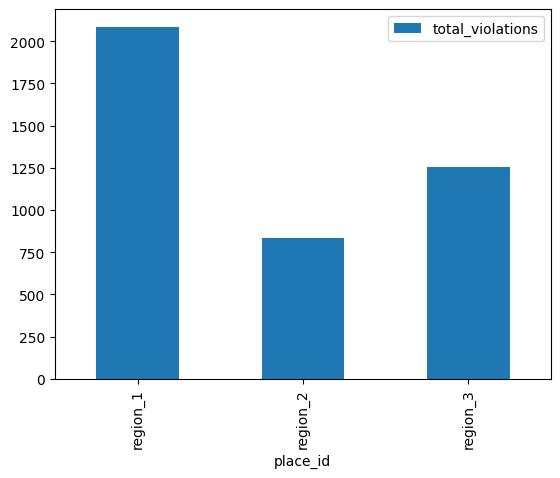

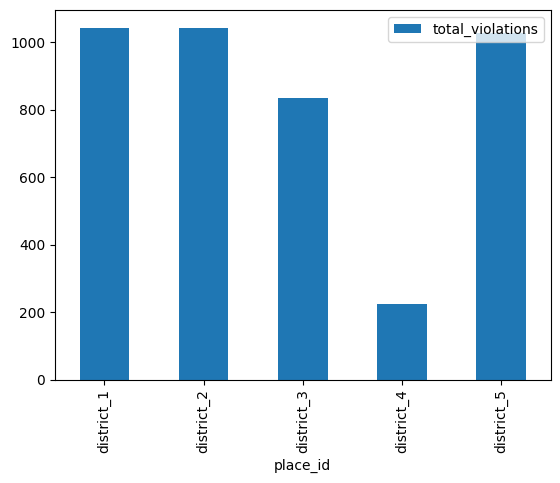

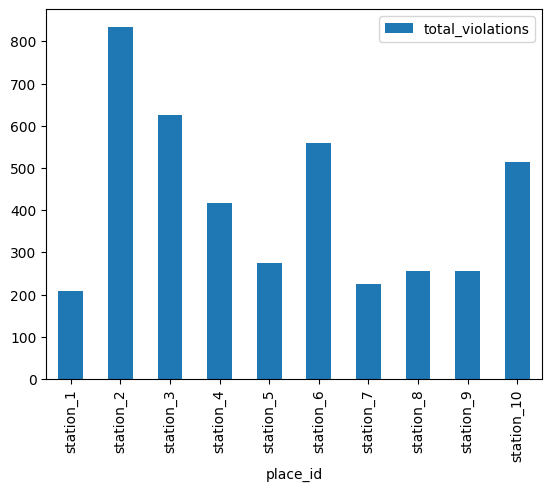

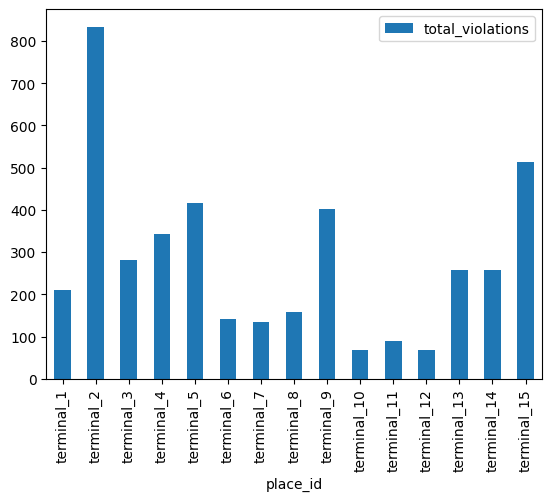

In [6]:
for place_type in place_types:
    df = violations_df[violations_df['place_type']==place_type]
    df.plot(x="place_id", y="total_violations", kind="bar")

In [7]:
places_df = pd.read_csv('../places.csv')

In [8]:
places_df.columns

Index(['place_id', 'parent_id'], dtype='object')

In [9]:
total_violations_with_parent_df = violations_df.merge(places_df[['place_id', 'parent_id']], on = 'place_id', how = 'left')

In [10]:
total_violations_with_parent_df

,place_id,place_type,total_violations,parent_id
0,region_1,region,2086,NaN
1,district_1,district,1043,region_1
2,station_1,station,209,district_1
3,terminal_1,terminal,209,station_1
4,station_2,station,834,district_1
5,terminal_2,terminal,834,station_2
6,district_2,district,1043,region_1
7,station_3,station,626,district_2
8,terminal_3,terminal,282,station_3
9,terminal_4,terminal,344,station_3


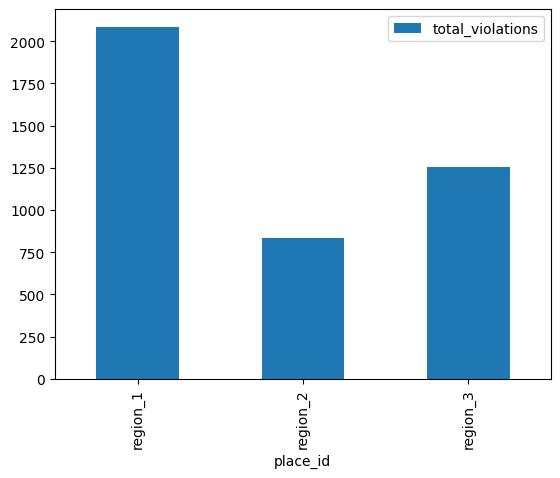

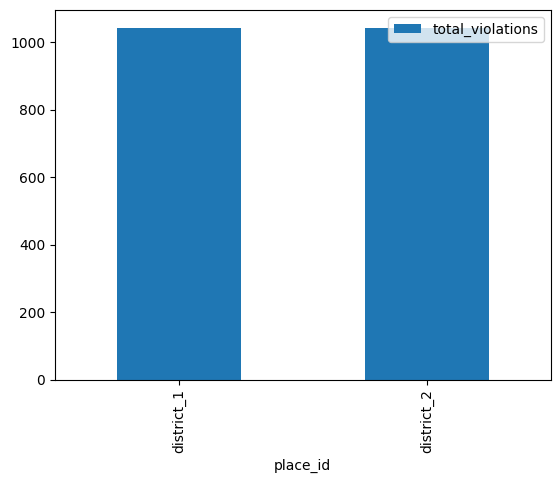

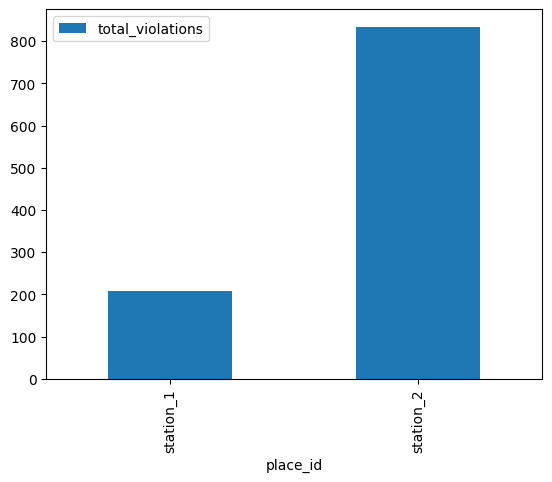

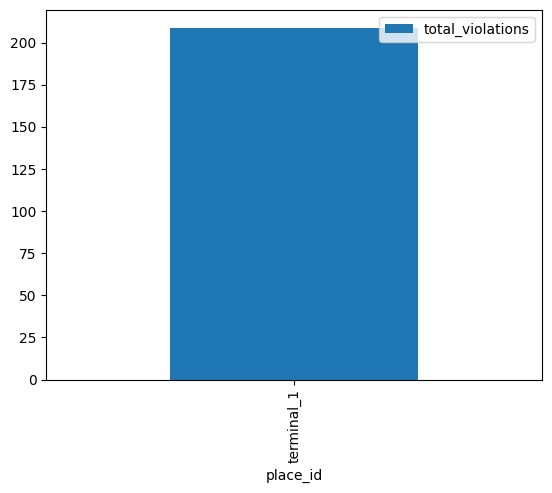

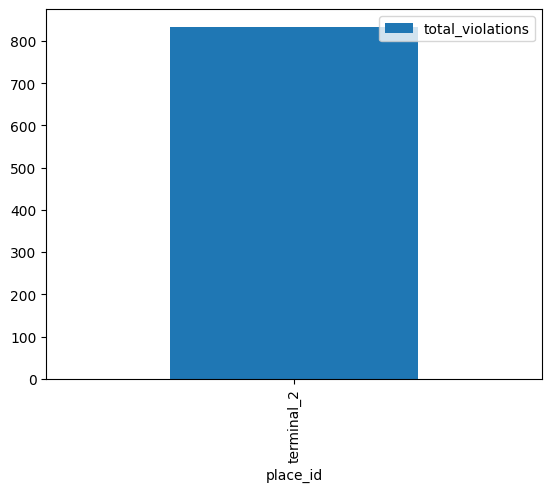

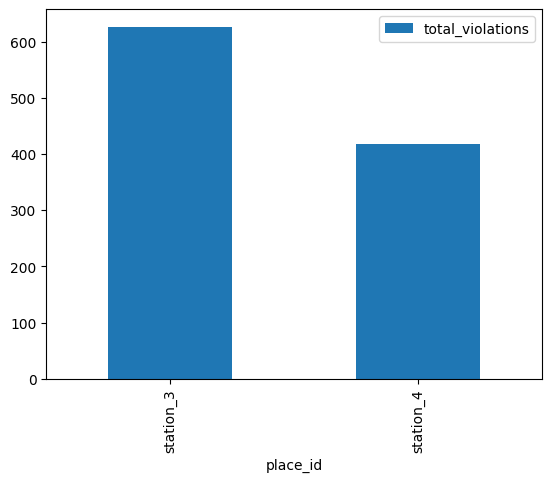

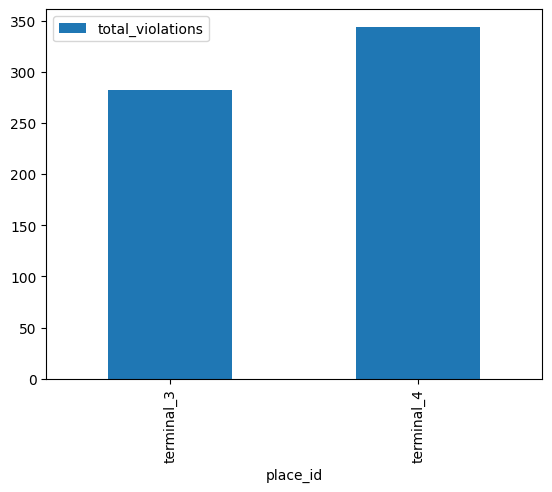

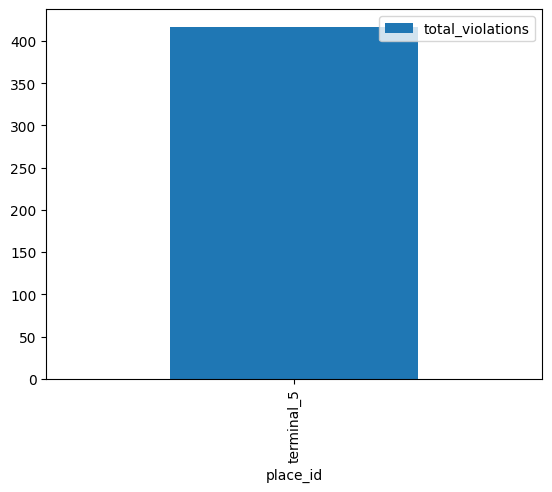

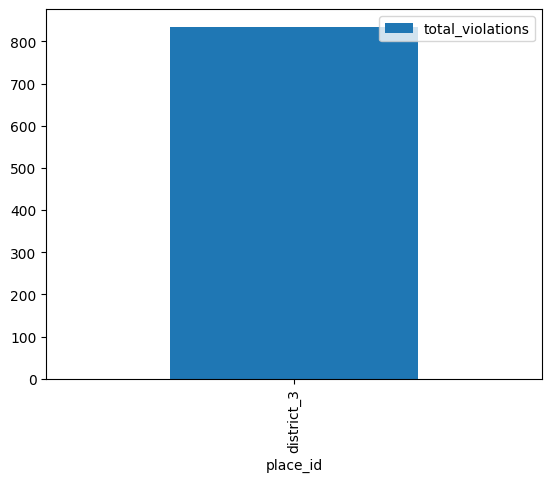

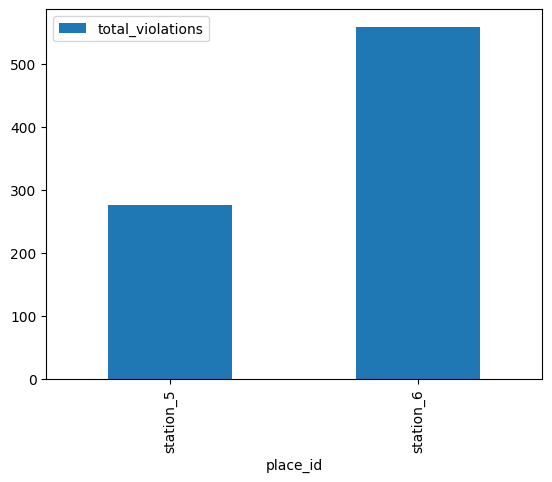

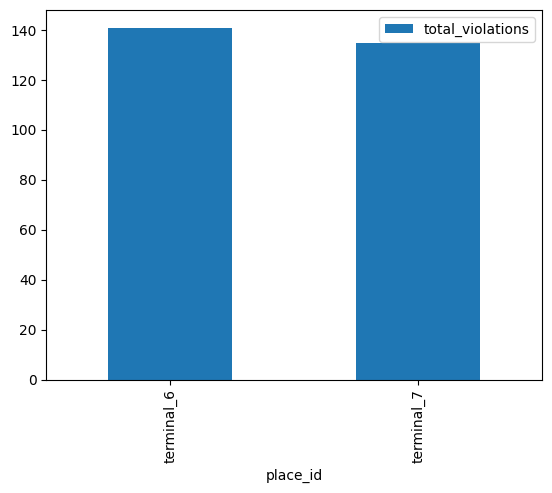

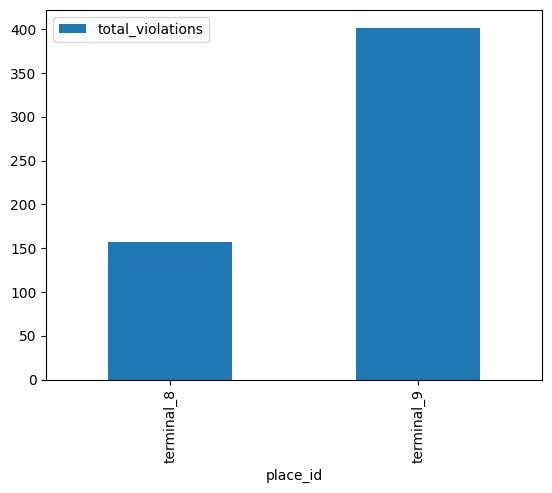

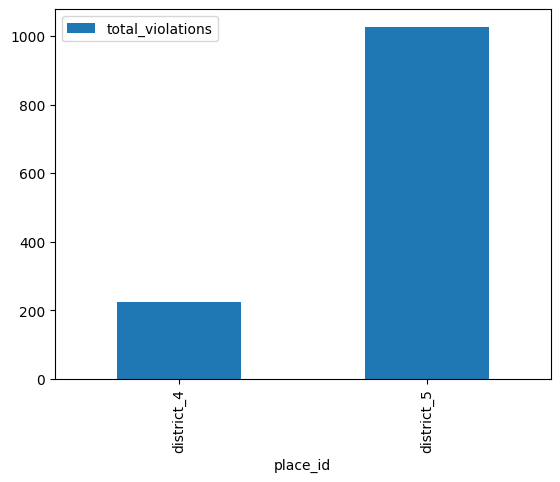

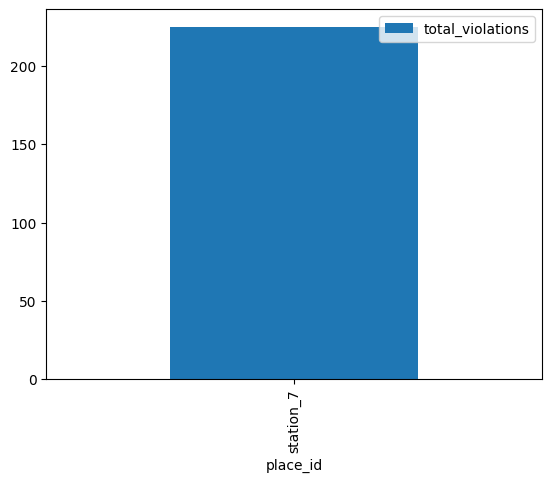

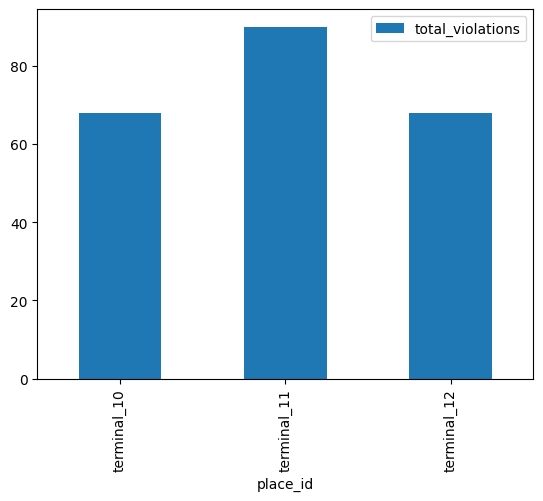

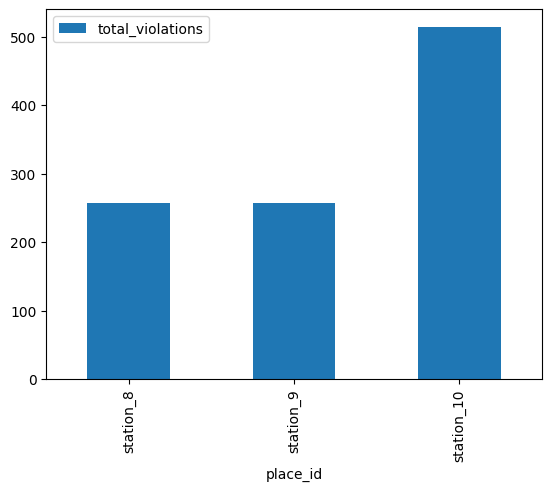

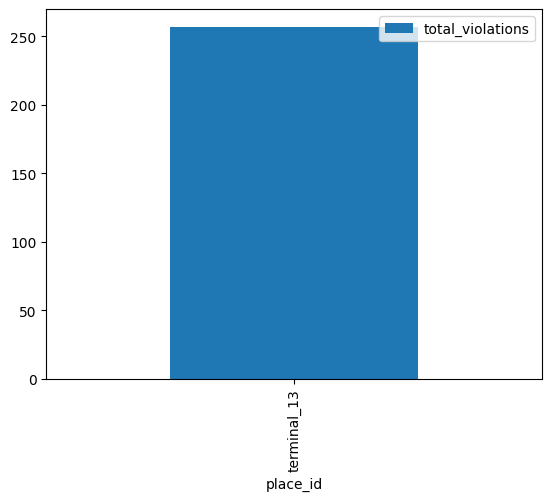

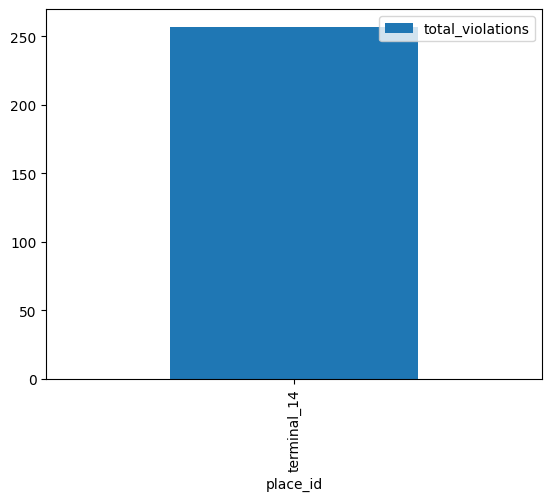

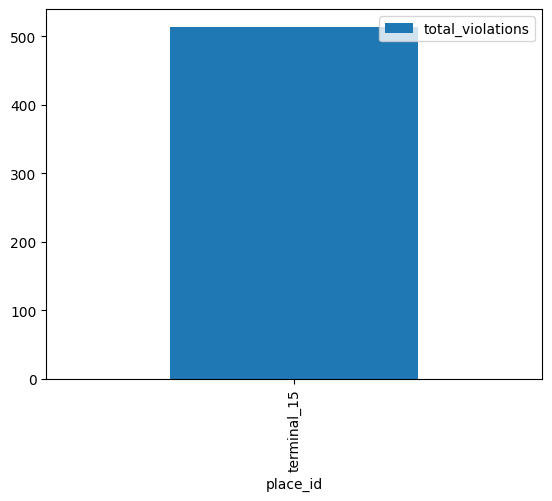

In [11]:
regions = total_violations_with_parent_df[total_violations_with_parent_df['place_type']=='region']
regions.plot(x="place_id", y="total_violations", kind="bar")
for ind in regions.index:
    region = regions['place_id'][ind]
    districts = total_violations_with_parent_df[total_violations_with_parent_df['parent_id']==region]
    districts.plot(x="place_id", y="total_violations", kind="bar")
    for ind in districts.index:
        district = districts['place_id'][ind]
        stations = total_violations_with_parent_df[total_violations_with_parent_df['parent_id']==district]
        stations.plot(x="place_id", y="total_violations", kind="bar")
        for ind in stations.index:
            station = stations['place_id'][ind]
            terminals = total_violations_with_parent_df[total_violations_with_parent_df['parent_id']==station]
            terminals.plot(x="place_id", y="total_violations", kind="bar")

In [12]:
driver_viol_df = pd.read_json("../driver_violations_table_v0.json")

In [13]:
driver_viol_df

,driver_id,total_violations
0,driver_1,209
1,driver_2,167
2,driver_3,334
3,driver_4,334
4,driver_5,141
5,driver_6,56
6,driver_7,85
7,driver_8,344
8,driver_9,417
9,driver_10,42


<Axes: xlabel='driver_id'>

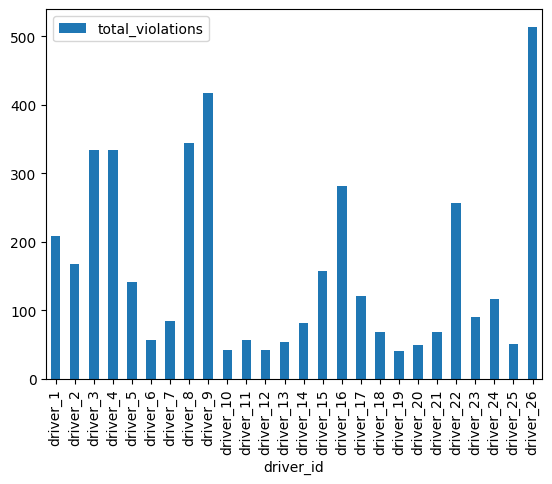

In [14]:
driver_viol_df.plot(x="driver_id", y="total_violations", kind="bar")

In [40]:
driver_viol_ranges = pd.read_json("../driver_violation_ranges_v0.json")

In [41]:
driver_viol_ranges

,driver_id,start,end,duration
0,driver_1,2022-07-07T23:49,2022-07-08T01:49,2
1,driver_1,2022-11-02T01:10,2022-11-02T05:10,4
2,driver_1,2022-04-22T00:36,2022-04-22T06:36,6
3,driver_1,2022-02-12T00:13,2022-02-12T03:13,3
4,driver_1,2022-02-02T22:23,2022-02-02T23:23,1
...,...,...,...,...
4170,driver_26,2022-01-17T15:49,2022-01-17T22:49,7
4171,driver_26,2022-11-25T23:27,2022-11-26T03:27,4
4172,driver_26,2022-02-27T05:41,2022-02-27T09:41,4
4173,driver_26,2022-11-28T23:34,2022-11-29T01:34,2


In [61]:
from datetime import datetime

day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

columns = driver_viol_ranges.columns
driver_viol_ranges_copy = driver_viol_ranges.loc[:, columns]
driver_viol_ranges_copy['month']=0
driver_viol_ranges_copy['weekday']=''
driver_viol_ranges_copy['day']=0
driver_viol_ranges_copy['hours'] = ''
driver_viol_ranges_copy['dates'] = ''
for i in range(len(driver_viol_ranges_copy)):
    start = driver_viol_ranges_copy.loc[i, 'start']
    start_date = start.split('T')[0]
    start_time = datetime.strptime(start, '%Y-%m-%dT%H:%M')
    end = driver_viol_ranges_copy.loc[i, 'end']
    end_date = end.split('T')[0]
    end_time = datetime.strptime(end, '%Y-%m-%dT%H:%M')
    print("start_time: ", start_time)
    print("end_time: ", end_time)
    dts = pd.date_range(datetime.strptime(start_date, '%Y-%m-%d'), datetime.strptime(end_date, '%Y-%m-%d'),freq='d')
    print("dts: ", dts)
    dates = []
    for dt in dts:
        dates.append(dt.strftime("%Y-%m-%d"))
    if len(dates) > 1:
        print(driver_viol_ranges_copy.loc[i])
    dts = pd.date_range(start_time, end_time,freq='h')
    driver_viol_ranges_copy.at[i, 'dates'] = dates
    hours = []
    for dt in dts:
        hours.append(dt.hour)
    driver_viol_ranges_copy.at[i, 'hours'] = hours
    month = start_time.month
    day = start_time.day
    weekday = start_time.weekday()
    driver_viol_ranges_copy.loc[i, 'weekday'] = day_name[weekday]
    driver_viol_ranges_copy.loc[i, 'month'] = month
    driver_viol_ranges_copy.loc[i, 'day'] = day
    start_hour = start_time.hour
    end_hour = end_time.hour
    # hours = []
    # for hour in range(start_hour, end_hour+1):
    #     hours.append(hour)
    # driver_viol_ranges_copy.at[i, 'hours'] = hours
    # driver_viol_ranges_copy.at[i, 'hours'] = [start_hour]

start_time:  2022-07-07 23:49:00
end_time:  2022-07-08 01:49:00
dts:  DatetimeIndex(['2022-07-07', '2022-07-08'], dtype='datetime64[ns]', freq='D')
driver_id            driver_1
start        2022-07-07T23:49
end          2022-07-08T01:49
duration                    2
month                       0
weekday                      
day                         0
hours                        
dates                        
Name: 0, dtype: object
start_time:  2022-11-02 01:10:00
end_time:  2022-11-02 05:10:00
dts:  DatetimeIndex(['2022-11-02'], dtype='datetime64[ns]', freq='D')
start_time:  2022-04-22 00:36:00
end_time:  2022-04-22 06:36:00
dts:  DatetimeIndex(['2022-04-22'], dtype='datetime64[ns]', freq='D')
start_time:  2022-02-12 00:13:00
end_time:  2022-02-12 03:13:00
dts:  DatetimeIndex(['2022-02-12'], dtype='datetime64[ns]', freq='D')
start_time:  2022-02-02 22:23:00
end_time:  2022-02-02 23:23:00
dts:  DatetimeIndex(['2022-02-02'], dtype='datetime64[ns]', freq='D')
start_time:  2022-04-17

In [62]:
driver_viol_ranges_copy

,driver_id,start,end,duration,month,weekday,day,hours,dates
0,driver_1,2022-07-07T23:49,2022-07-08T01:49,2,7,Thursday,7,"[23, 0, 1]","[2022-07-07, 2022-07-08]"
1,driver_1,2022-11-02T01:10,2022-11-02T05:10,4,11,Wednesday,2,"[1, 2, 3, 4, 5]",[2022-11-02]
2,driver_1,2022-04-22T00:36,2022-04-22T06:36,6,4,Friday,22,"[0, 1, 2, 3, 4, 5, 6]",[2022-04-22]
3,driver_1,2022-02-12T00:13,2022-02-12T03:13,3,2,Saturday,12,"[0, 1, 2, 3]",[2022-02-12]
4,driver_1,2022-02-02T22:23,2022-02-02T23:23,1,2,Wednesday,2,"[22, 23]",[2022-02-02]
...,...,...,...,...,...,...,...,...,...
4170,driver_26,2022-01-17T15:49,2022-01-17T22:49,7,1,Monday,17,"[15, 16, 17, 18, 19, 20, 21, 22]",[2022-01-17]
4171,driver_26,2022-11-25T23:27,2022-11-26T03:27,4,11,Friday,25,"[23, 0, 1, 2, 3]","[2022-11-25, 2022-11-26]"
4172,driver_26,2022-02-27T05:41,2022-02-27T09:41,4,2,Sunday,27,"[5, 6, 7, 8, 9]",[2022-02-27]
4173,driver_26,2022-11-28T23:34,2022-11-29T01:34,2,11,Monday,28,"[23, 0, 1]","[2022-11-28, 2022-11-29]"


<Axes: xlabel='month'>

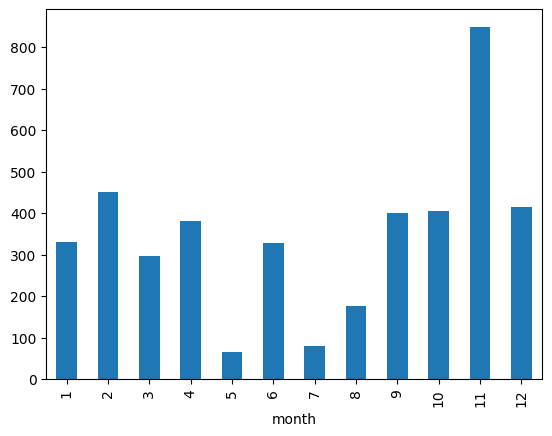

In [19]:
month_counts = driver_viol_ranges_copy.month.value_counts().sort_index()
month_counts.plot(x="month", kind='bar')

<Axes: xlabel='hours'>

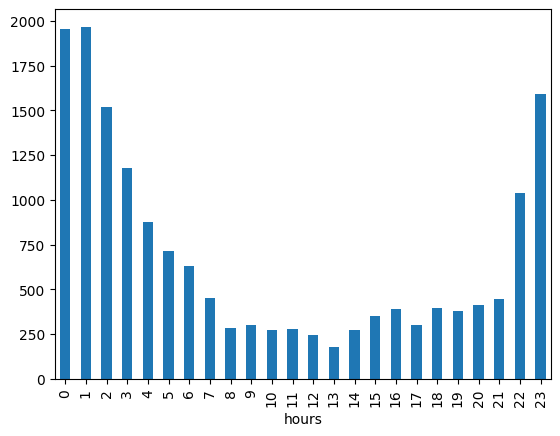

In [48]:
hour_counts = driver_viol_ranges_copy['hours'].explode().value_counts().sort_index()
hour_counts.plot(x="hour", kind='bar')

<Axes: xlabel='duration'>

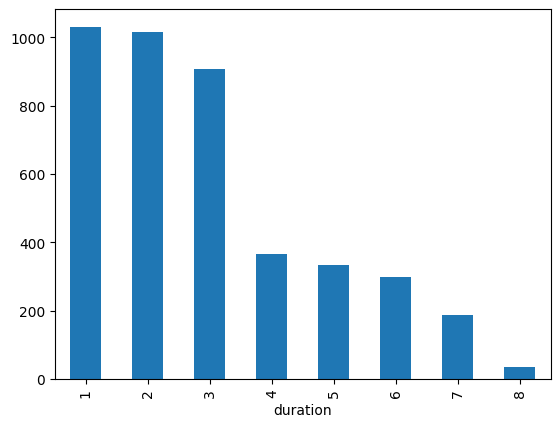

In [21]:
duration_counts = driver_viol_ranges_copy['duration'].value_counts().sort_index()
duration_counts.plot(x="duration", kind='bar')

<Axes: xlabel='day'>

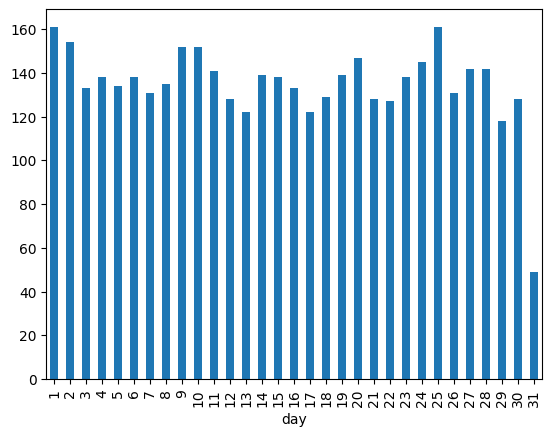

In [22]:
day_counts = driver_viol_ranges_copy['day'].value_counts().sort_index()
day_counts.plot(x="day", kind='bar')

<Axes: xlabel='weekday'>

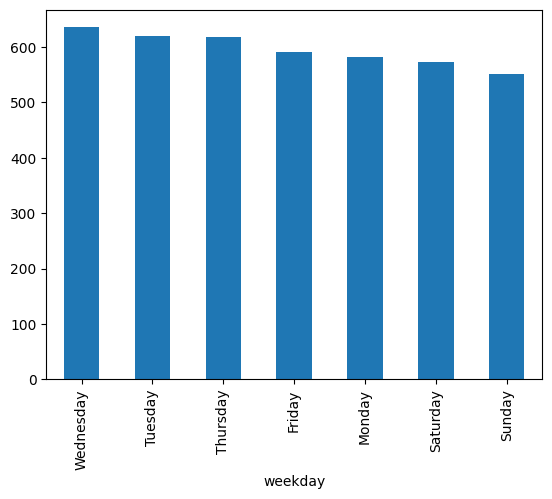

In [23]:
weekday_counts = driver_viol_ranges_copy['weekday'].value_counts()
weekday_counts.plot(x="weekday", kind='bar')

In [24]:
driver_26_viol = driver_viol_ranges_copy[driver_viol_ranges_copy['driver_id']=='driver_26']

In [25]:
driver_26_viol

,driver_id,start,end,duration,month,weekday,day,hours
3661,driver_26,03-20-2022T23:05,03-21-2022T00:05,1,3,Sunday,20,[23]
3662,driver_26,11-24-2022T23:34,11-25-2022T06:34,7,11,Thursday,24,[23]
3663,driver_26,06-18-2022T21:43,06-19-2022T00:43,3,6,Saturday,18,[21]
3664,driver_26,08-06-2022T00:49,08-06-2022T02:49,2,8,Saturday,6,[0]
3665,driver_26,12-29-2022T23:08,12-30-2022T05:08,6,12,Thursday,29,[23]
...,...,...,...,...,...,...,...,...
4170,driver_26,11-27-2022T23:29,11-28-2022T02:29,3,11,Sunday,27,[23]
4171,driver_26,06-14-2022T23:28,06-15-2022T02:28,3,6,Tuesday,14,[23]
4172,driver_26,04-30-2022T14:19,04-30-2022T15:19,1,4,Saturday,30,[14]
4173,driver_26,12-12-2022T01:43,12-12-2022T04:43,3,12,Monday,12,[1]


<Axes: xlabel='weekday'>

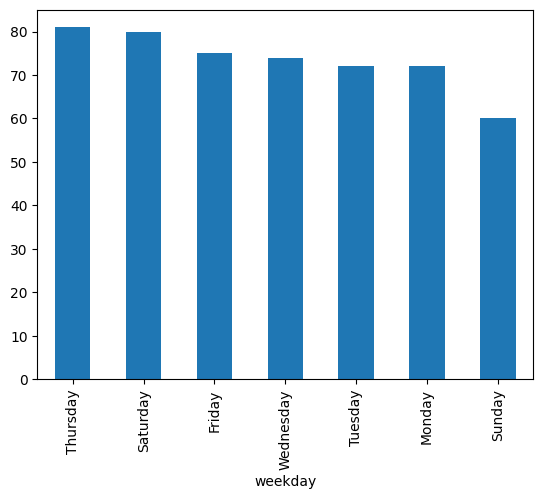

In [26]:
weekday_counts = driver_26_viol['weekday'].value_counts()
weekday_counts.plot(x="weekday", kind='bar')

<Axes: xlabel='dates'>

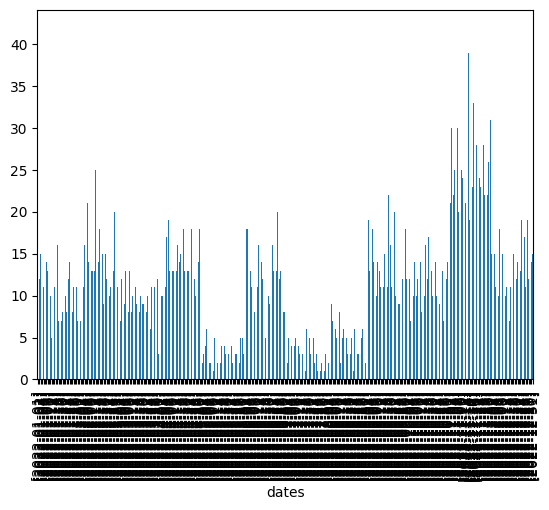

In [50]:
date_counts = driver_viol_ranges_copy['dates'].value_counts().sort_index()
date_counts.plot(kind='bar')

In [51]:
data = {'timestamp': ['2022-01-01 00:00:00', '2022-01-01 01:00:00', '2022-01-01 03:00:00', '2022-01-01 05:00:00'], 'value': [10, 20, 30, 40]}
df = pd.DataFrame(data)

# Convert the 'timestamp' column to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Resample the time series to a frequency of 1 hour
df_resampled = df.resample('1H').mean()

In [52]:
df_resampled

,value
timestamp,
2022-01-01 00:00:00,10.0
2022-01-01 01:00:00,20.0
2022-01-01 02:00:00,NaN
2022-01-01 03:00:00,30.0
2022-01-01 04:00:00,NaN
2022-01-01 05:00:00,40.0


In [63]:
driver_viol_ranges_multiple_dates = driver_viol_ranges_copy[driver_viol_ranges_copy.dates.map(len)>1]

In [86]:
driver_viol_ranges_date_expanded = driver_viol_ranges_copy.explode('dates').reset_index()
driver_viol_ranges_date_expanded = driver_viol_ranges_date_expanded.rename(columns={'dates': 'date'})

In [87]:
driver_viol_ranges_date_expanded = driver_viol_ranges_date_expanded.drop(['start', 'end', 'duration', 'hours'], axis=1)

In [88]:
driver_viol_ranges_date_expanded

,index,driver_id,month,weekday,day,date
0,0,driver_1,7,Thursday,7,2022-07-07
1,0,driver_1,7,Thursday,7,2022-07-08
2,1,driver_1,11,Wednesday,2,2022-11-02
3,2,driver_1,4,Friday,22,2022-04-22
4,3,driver_1,2,Saturday,12,2022-02-12
...,...,...,...,...,...,...
5523,4172,driver_26,2,Sunday,27,2022-02-27
5524,4173,driver_26,11,Monday,28,2022-11-28
5525,4173,driver_26,11,Monday,28,2022-11-29
5526,4174,driver_26,12,Saturday,17,2022-12-17


In [90]:
for i in range(len(driver_viol_ranges_date_expanded)):
    date = datetime.strptime(driver_viol_ranges_date_expanded.loc[i]['date'], '%Y-%m-%d')
    month = date.month
    day = date.day
    weekday = date.weekday()
    driver_viol_ranges_date_expanded.loc[i, 'weekday'] = day_name[weekday]
    driver_viol_ranges_date_expanded.loc[i, 'month'] = month
    driver_viol_ranges_date_expanded.loc[i, 'day'] = day

In [92]:
driver_viol_ranges_date_expanded['has_violation']=1

In [93]:
driver_viol_ranges_date_expanded

,index,driver_id,month,weekday,day,date,has_violation
0,0,driver_1,7,Thursday,7,2022-07-07,1
1,0,driver_1,7,Friday,8,2022-07-08,1
2,1,driver_1,11,Wednesday,2,2022-11-02,1
3,2,driver_1,4,Friday,22,2022-04-22,1
4,3,driver_1,2,Saturday,12,2022-02-12,1
...,...,...,...,...,...,...,...
5523,4172,driver_26,2,Sunday,27,2022-02-27,1
5524,4173,driver_26,11,Monday,28,2022-11-28,1
5525,4173,driver_26,11,Tuesday,29,2022-11-29,1
5526,4174,driver_26,12,Saturday,17,2022-12-17,1


In [96]:
driver_viol_ranges_group_by_date = driver_viol_ranges_date_expanded.groupby('date')['driver_id'].agg(' '.join).reset_index()

In [109]:
driver_viol_ranges_group_by_date['driver_ids'] = driver_viol_ranges_group_by_date['driver_id'].str.split(' ')

In [111]:
driver_viol_ranges_group_by_date.drop(['driver_id'], )

,date,driver_id,driver_ids
0,2022-01-01,driver_2 driver_2 driver_3 driver_3 driver_3 d...,"[driver_2, driver_2, driver_3, driver_3, drive..."
1,2022-01-02,driver_2 driver_2 driver_3 driver_3 driver_3 d...,"[driver_2, driver_2, driver_3, driver_3, drive..."
2,2022-01-03,driver_2 driver_3 driver_8 driver_8 driver_8 d...,"[driver_2, driver_3, driver_8, driver_8, drive..."
3,2022-01-04,driver_1 driver_1 driver_4 driver_9 driver_15 ...,"[driver_1, driver_1, driver_4, driver_9, drive..."
4,2022-01-05,driver_1 driver_2 driver_4 driver_9 driver_9 d...,"[driver_1, driver_2, driver_4, driver_9, drive..."
...,...,...,...
360,2022-12-28,driver_2 driver_3 driver_4 driver_4 driver_6 d...,"[driver_2, driver_3, driver_4, driver_4, drive..."
361,2022-12-29,driver_1 driver_1 driver_3 driver_3 driver_4 d...,"[driver_1, driver_1, driver_3, driver_3, drive..."
362,2022-12-30,driver_1 driver_1 driver_2 driver_2 driver_3 d...,"[driver_1, driver_1, driver_2, driver_2, drive..."
363,2022-12-31,driver_2 driver_2 driver_2 driver_3 driver_7 d...,"[driver_2, driver_2, driver_2, driver_3, drive..."
